In [ ]:
# Import libraries
import numpy as np
import pandas as pd
import sklearn as sk
import time
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Flatten
from keras import optimizers
from keras import backend as K
from keras import regularizers
from keras import initializers
from matplotlib import pyplot as plt
from tensorflow import keras

# **Amazon**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
%cd /content/drive/My Drive
!ls


/content/drive/My Drive
 algorithm.pdf
'Amazon US 评论信息采集600.csv'
'Amazon US 评论信息采集.csv'
'Amazon US 评论信息采集.csv（副本）'
'B6 Xinxue Lu resume.pdf'
 Classroom
'Colab Notebooks'
 county_images.rar
 county_images.zip
'documentaryfilm.exam1 Summer 2020 (1).gdoc'
'documentaryfilm.exam1 Summer 2020.gdoc'
'documentaryfilm.lumieres presentation.gdoc'
'for laptop.gdoc'
'Intro to Linear Algebra.pdf'
'lab4 (1).py'
 lab4.py
' Lcs3.docx'
'Part 1（300） (1).rar'
'Part 1（300）.rar'
 set2.rar
 set3.rar
'SimHei (1).ttf'
 SimHei.ttf
'statement of interest.pdf'
 京东评论-当前商品最近评论1043.csv
 京东评论-当前商品最近评论.csv
 天猫商品评论-限本地采集180.csv
 新生手册.gdoc
 无标题演示文稿.gslides


In [ ]:
import io
Amazon = pd.read_csv('Amazon US 评论信息采集.csv')

In [ ]:
Amazon

,ASIN,CommentsTitle,CommentsStars,CommentsAuthor,CommentsDate,CommentsContent,PurchasemModel_Size,PurchasemModel_Color,页面网址
0,NaN,\n\n\n\n\n\n\n\n \n \n Super Quiet\n \n,4.0,Allen Risler,"Reviewed in the United States April 13, 2023",\n\n\n\n\n\n\n\n \n \n I found this unit ...,Size: 12000 BTUStyle: AC,Size: 12000 BTUStyle: AC,https://www.amazon.com/Midea-Inverter-Conditio...
1,NaN,\n\n\n\n\n\n\n\n \n \n Manufacturing Issu...,1.0,MK53,"Reviewed in the United States April 12, 2023",\n\n\n\n\n\n\n\n \n \n After installing t...,Size: 12000 BTUStyle: AC,Size: 12000 BTUStyle: AC,https://www.amazon.com/Midea-Inverter-Conditio...
2,NaN,\n\n\n\n\n\n\n\n \n \n EC 07 Fix! Had iss...,3.0,Robert Lussier,"Reviewed in the United States April 12, 2023",\n\n\n\n\n\n\n\n \n \n Had issues directl...,Size: 8000 BTUStyle: AC,Size: 8000 BTUStyle: AC,https://www.amazon.com/Midea-Inverter-Conditio...
3,NaN,\n\n\n\n\n\n\n\n \n \n UPDATE EC 07 code ...,4.0,Jason Whitt,"Reviewed in the United States April 12, 2023",\n\n\n\n\n\n\n\n \n \n Review update...I ...,Size: 12000 BTUStyle: AC,Size: 12000 BTUStyle: AC,https://www.amazon.com/Midea-Inverter-Conditio...
4,NaN,\n\n\n\n\n\n\n\n \n \n impossible to inst...,1.0,chandler,"Reviewed in the United States April 12, 2023",\n\n\n\n\n\n\n\n \n \n don’t buy this the...,Size: 8000 BTUStyle: AC,Size: 8000 BTUStyle: AC,https://www.amazon.com/Midea-Inverter-Conditio...
...,...,...,...,...,...,...,...,...,...
295,NaN,\n\n\n\n\n\n\n\n \n \n It's been working ...,5.0 颗星，最多 5 颗星,Oregon Raven,2022年9月9日 在美国审核,\n\n\n\n\n\n\n\n \n \n This has made our ...,"颜色: 白色尺寸: 8,000 BTU","颜色: 白色尺寸: 8,000 BTU",https://www.amazon.com/MAP08R1CWT-Portable-Con...
296,NaN,\n\n\n\n\n\n\n\n \n \n Started leaking af...,2.0 颗星，最多 5 颗星,Kyle Foley,2022年9月8日 在美国审核,\n\n\n\n\n\n\n\n \n \n Instead of auto-st...,"颜色: 白色尺寸: 8,000 BTU","颜色: 白色尺寸: 8,000 BTU",https://www.amazon.com/MAP08R1CWT-Portable-Con...
297,NaN,\n\n\n\n\n\n\n\n \n \n An answer to praye...,5.0 颗星，最多 5 颗星,Kindle Customer,2022年9月7日 在美国审核,\n\n\n\n\n\n\n\n \n \n I am not allowed t...,"颜色: 黑色//白色尺寸: 14,000 BTU with Heat","颜色: 黑色//白色尺寸: 14,000 BTU with Heat",https://www.amazon.com/MAP08R1CWT-Portable-Con...
298,NaN,\n\n\n\n\n\n\n\n \n \n Have had it for a ...,1.0 颗星，最多 5 颗星,Lindsay,2022年9月7日 在美国审核,NaN,"颜色: 白色尺寸: 8,000 BTU","颜色: 白色尺寸: 8,000 BTU",https://www.amazon.com/MAP08R1CWT-Portable-Con...


In [ ]:
# Remove raw data columns: '页面网址','PurchasemModel_Color','PurchasemModel_Size','ASIN'
Amazon = Amazon.drop(['页面网址', 'PurchasemModel_Color','PurchasemModel_Size','ASIN'], axis=1)

In [ ]:
# 修改排序
Amazon = Amazon[['CommentsAuthor','CommentsDate','CommentsStars','CommentsTitle','CommentsContent']]

In [ ]:
# 将评价星级全部统一为x.0的单纯的数字
Amazon['CommentsStars'] = Amazon.CommentsStars.apply(lambda x:x.split(' ')[0])

In [ ]:
# 将评价日期进行格式统一
def extract_date(text):
    # 用正则表达式匹配英文日期格式
    eng_date_pattern = r"(\b(?:January|February|March|April|May|June|July|August|September|October|November|December)\b \d{1,2}, \d{4})"
    eng_date = re.search(eng_date_pattern, text)
    
    # 用正则表达式匹配中文日期格式
    cn_date_pattern = r"(\d{4}年\d{1,2}月\d{1,2}日)"
    cn_date = re.search(cn_date_pattern, text)
    
    if eng_date:
        return eng_date.group(0)
    elif cn_date:
        return cn_date.group(0)
    else:
        return None


In [ ]:
import re
Amazon["CommentsDate"] = Amazon["CommentsDate"].apply(extract_date)

In [ ]:
from datetime import datetime
def eng_to_cn_date(date_str):
    # 将英文日期解析为datetime对象
    eng_date_format = "%B %d, %Y"
    date_obj = datetime.strptime(date_str, eng_date_format)
    
    # 将datetime对象转换为中文日期格式
    cn_date_format = "%Y年%m月%d日"
    return date_obj.strftime(cn_date_format)
def is_eng_date(date_str):
    eng_date_pattern = r"(\b(?:January|February|March|April|May|June|July|August|September|October|November|December)\b \d{1,2}, \d{4})"
    return bool(re.search(eng_date_pattern, date_str))
def unify_date_format(date_str):
    if is_eng_date(date_str):
        return eng_to_cn_date(date_str)
    else:
        return date_str
Amazon["CommentsDate"] = Amazon["CommentsDate"].apply(unify_date_format)


In [ ]:
# 清理换行符
Amazon["CommentsTitle"] = Amazon["CommentsTitle"].replace(r'\n', ' ', regex=True)
Amazon["CommentsContent"] = Amazon["CommentsContent"].replace(r'\n', ' ', regex=True)

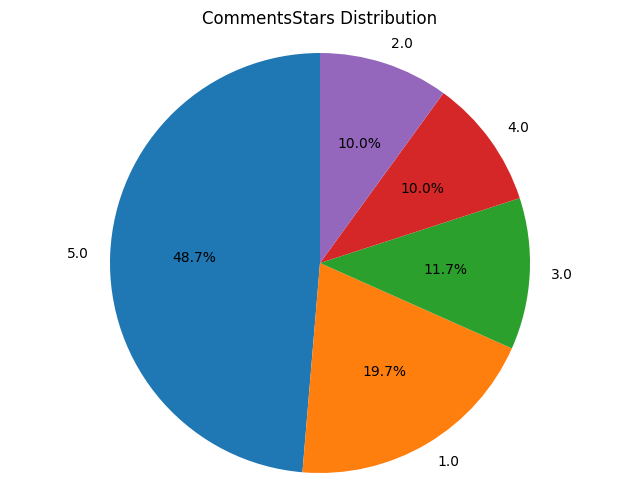

In [ ]:
# 对CommentsStars进行视觉化展示
sentiment_counts = Amazon['CommentsStars'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # 使饼图呈圆形
plt.title('CommentsStars Distribution')
plt.show()



In [ ]:
# 对评论进行感情分析
import pandas as pd
from textblob import TextBlob

def sentiment_score(text):
    # 如果text不是字符串类型，则返回None（选择其他默认值）
    if not isinstance(text, str):
        return None

    analysis = TextBlob(text)
    return analysis.sentiment.polarity

Amazon['SentimentScore'] = Amazon['CommentsContent'].apply(sentiment_score)
def sentiment_label(score):
    if score > 0.2:
        return 'positive'
    elif score < -0.2:
        return 'negative'
    else:
        return 'neutral'

Amazon['SentimentLabel'] = Amazon['SentimentScore'].apply(sentiment_label)


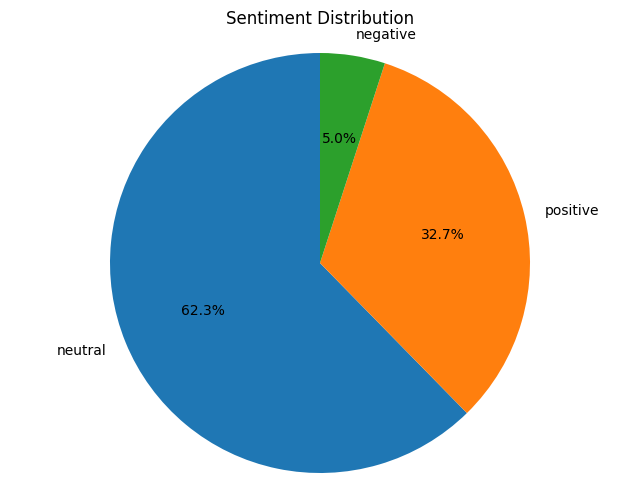

In [ ]:
sentiment_counts = Amazon['SentimentLabel'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # 使饼图呈圆形
plt.title('Sentiment Distribution')
plt.show()


In [ ]:
def convert_date(date_str):
    # 使用正则表达式提取年、月、日
    match = re.match(r'(\d{4})年(\d{1,2})月(\d{1,2})日', date_str)
    if match:
        year, month, day = match.groups()
        return f'{year}-{month.zfill(2)}-{day.zfill(2)}'
    else:
        return date_str

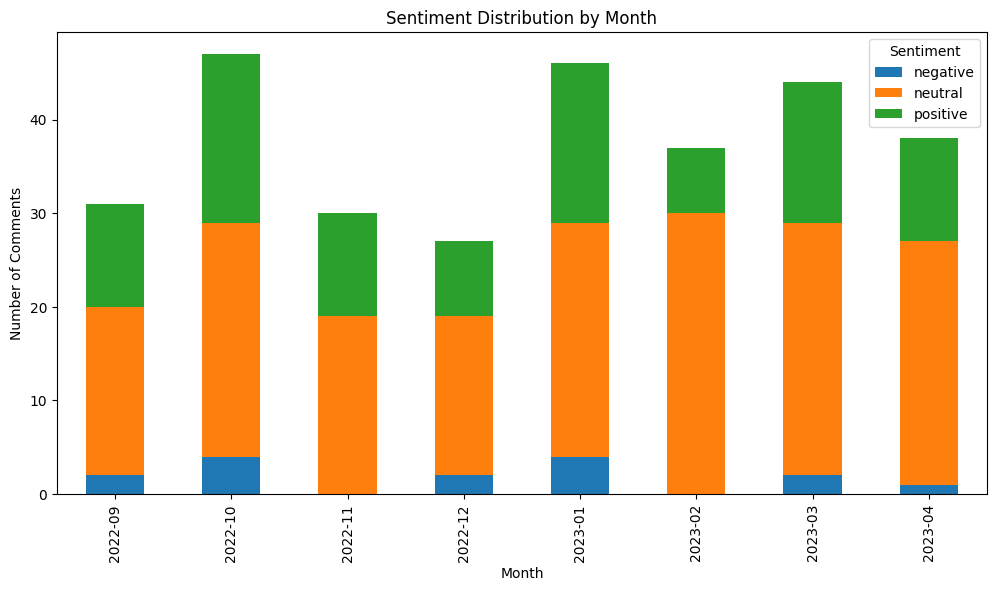

In [ ]:
# 整个时间线顾客情感倾向的变化
# 截取月份（不包括天数）
Amazon['CommentsDate'] = Amazon['CommentsDate'].apply(convert_date)
Amazon['CommentsDate'] = pd.to_datetime(Amazon['CommentsDate'], errors='coerce')
Amazon['Month'] = Amazon['CommentsDate'].apply(lambda x: x.strftime('%Y-%m'))

# 按月份和情感标签分组
grouped_df = Amazon.groupby(['SentimentLabel', 'Month']).size().reset_index(name='Count')

# 创建一个宽格式的DataFrame，其中每行表示一个月份，每列表示一个情感标签，值表示评论数量
pivot_df = grouped_df.pivot(index='Month', columns='SentimentLabel', values='Count').fillna(0)

# 创建堆叠柱状图
ax = pivot_df.plot(kind='bar', stacked=True, figsize=(12, 6))

# 设置图表标题和坐标轴标签
ax.set_title('Sentiment Distribution by Month')
ax.set_xlabel('Month')
ax.set_ylabel('Number of Comments')

# 添加图例
ax.legend(title='Sentiment')

# 显示图表
plt.show()


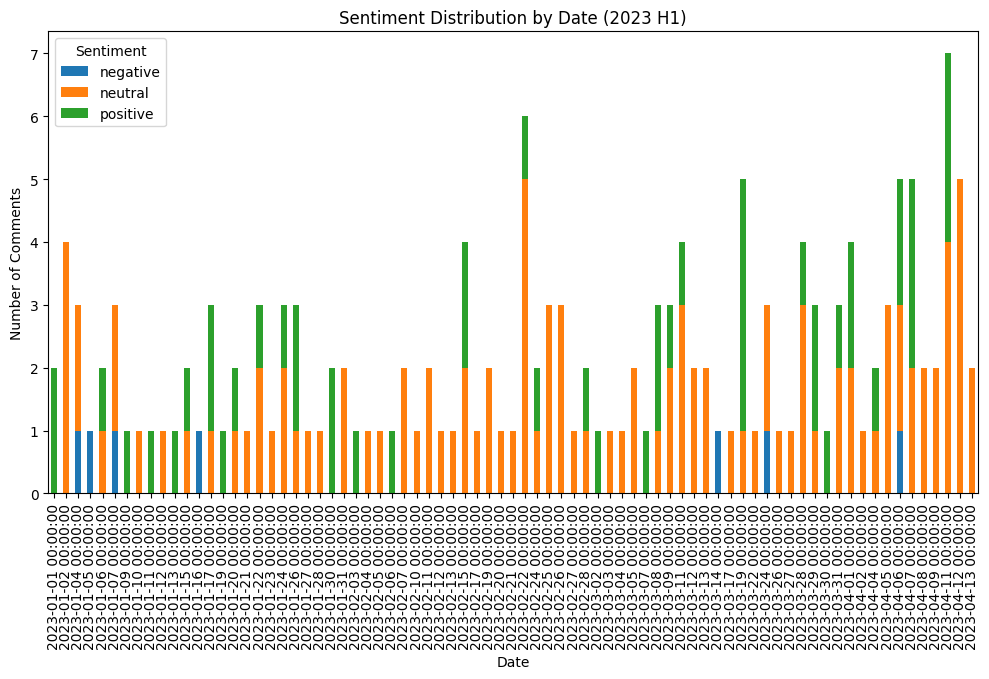

In [ ]:
# 2023年前半年
import re

start_date = pd.to_datetime('2023-01-01')
end_date = pd.to_datetime('2023-06-30')
filtered_df = Amazon[(Amazon['CommentsDate'] >= start_date) & (Amazon['CommentsDate'] <= end_date)]
grouped_df = filtered_df.groupby(['SentimentLabel', 'CommentsDate']).size().reset_index(name='Count')
import matplotlib.pyplot as plt
import seaborn as sns

# 创建一个宽格式的DataFrame，其中每行表示一个日期，每列表示一个情感标签，值表示评论数量
pivot_df = grouped_df.pivot(index='CommentsDate', columns='SentimentLabel', values='Count').fillna(0)

# 创建堆叠柱状图
ax = pivot_df.plot(kind='bar', stacked=True, figsize=(12, 6))

# 设置图表标题和坐标轴标签
ax.set_title('Sentiment Distribution by Date (2023 H1)')
ax.set_xlabel('Date')
ax.set_ylabel('Number of Comments')

# 添加图例
ax.legend(title='Sentiment')

# 显示图表
plt.show()



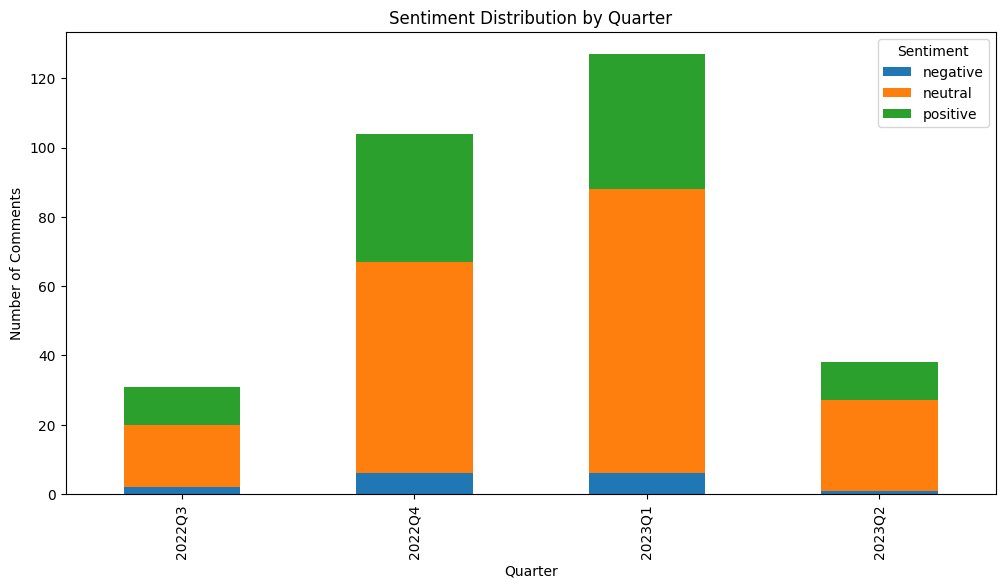

In [ ]:
#季度的趋势变化
Amazon['Quarter'] = Amazon['CommentsDate'].dt.to_period('Q')
grouped_df = Amazon.groupby(['SentimentLabel', 'Quarter']).size().reset_index(name='Count')
import matplotlib.pyplot as plt
import seaborn as sns

# 创建一个宽格式的DataFrame，其中每行表示一个季度，每列表示一个情感标签，值表示评论数量
pivot_df = grouped_df.pivot(index='Quarter', columns='SentimentLabel', values='Count').fillna(0)

# 创建堆叠柱状图
ax = pivot_df.plot(kind='bar', stacked=True, figsize=(12, 6))

# 设置图表标题和坐标轴标签
ax.set_title('Sentiment Distribution by Quarter')
ax.set_xlabel('Quarter')
ax.set_ylabel('Number of Comments')

# 添加图例
ax.legend(title='Sentiment')

# 显示图表
plt.show()


In [ ]:
#提取关键词
import spacy
from collections import Counter

nlp = spacy.load("en_core_web_sm")


def extract_keywords(text, num_keywords=5):
    filter_words = ["this unit","n’t","the unit","the","that","this","Amazon","Midea",
                    "this thing","the fan","the room","the window","the AC","this product"]  # 添加需要过滤掉的单词或短语

    if not isinstance(text, str):
        return []

    doc = nlp(text)

    # 过滤掉代词
    filtered_tokens = [token for token in doc if token.pos_ != "PRON"]

    # 提取名词短语
    noun_phrases = [chunk.text for chunk in nlp(" ".join([token.text for token in filtered_tokens])).noun_chunks]

    # 过滤掉特定的单词或短语
    filtered_phrases = [phrase for phrase in noun_phrases if phrase.lower() not in [word.lower() for word in filter_words]]

    # 计算名词短语出现次数
    counts = Counter(filtered_phrases)

    # 返回出现次数最多的前num_keywords个名词短语
    return counts.most_common(num_keywords)

Amazon['ContentKeywords'] = Amazon['CommentsContent'].apply(extract_keywords)
from collections import Counter

all_keywords = Counter()

for _, row in Amazon.iterrows():
    for keyword, count in row['ContentKeywords']:
        all_keywords[keyword] += count

# 按出现次数降序排列关键词
sorted_keywords = sorted(all_keywords.items(), key=lambda x: x[1], reverse=True)


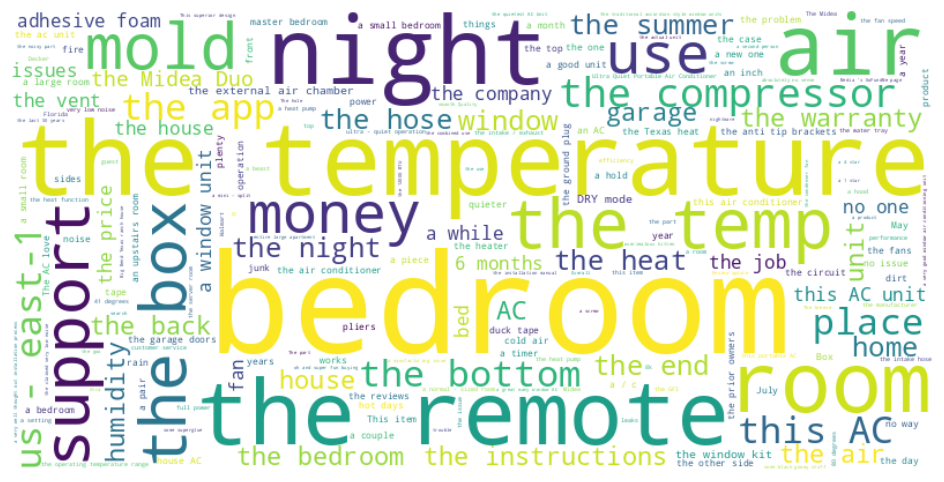

In [ ]:
# 视觉化关键词
from wordcloud import WordCloud
import matplotlib.pyplot as plt
# 将(sorted_keyword, frequency)元组列表转换为{keyword: frequency}字典
keyword_frequencies = dict(sorted_keywords)

# 创建词云对象
wordcloud = WordCloud(width=800, height=400, background_color='white')
wordcloud.generate_from_frequencies(keyword_frequencies)

# 显示词云
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [ ]:
# 显示频率最高的前10个关键词
top_keywords = sorted_keywords[:10]

# 打印高频词汇及其出现次数
for keyword, count in top_keywords:
    print(f"{keyword}: {count}")


bedroom: 14
the temperature: 12
night: 10
the remote: 9
air: 8
room: 8
the temp: 8
the box: 7
support: 7
mold: 7


In [ ]:
# 关键词和评分
grouped_by_stars = Amazon.groupby('CommentsStars')
keywords_by_stars = {}

for star, group in grouped_by_stars:
    star_keywords = Counter()

    for _, row in group.iterrows():
        for keyword, count in row['ContentKeywords']:
            star_keywords[keyword] += count

    keywords_by_stars[star] = star_keywords.most_common(10)  # 提取每个评分组中出现次数最多的前10个关键词
for star, keywords in keywords_by_stars.items():
    print(f"{star}星评分的关键词：")
    for keyword, count in keywords:
        print(f"{keyword}: {count}")
    print("\n")


1.0星评分的关键词：
money: 5
support: 4
the warranty: 4
the box: 4
night: 3
6 months: 3
the air: 3
no one: 3
the temperature: 3
the instructions: 2


2.0星评分的关键词：
the temperature: 5
air: 4
the bottom: 3
a while: 3
support: 3
the back: 3
the external air chamber: 3
duck tape: 2
dirt: 2
the top: 2


3.0星评分的关键词：
the hose: 5
the Midea Duo: 4
mold: 3
DRY mode: 3
the window kit: 3
the box: 2
the problem: 2
no way: 2
Ultra Quiet Portable Air Conditioner: 2
the heat: 2


4.0星评分的关键词：
mold: 4
the vent: 2
place: 2
the one: 2
the heater: 2
a month: 2
bedroom: 2
the end: 2
search: 1
the quietest AC Unit: 1


5.0星评分的关键词：
bedroom: 11
night: 7
room: 7
the remote: 7
the compressor: 6
the temp: 5
house: 4
the bedroom: 4
the summer: 4
use: 4




<ipython-input-28-c127288a2d19>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  keywords_df = keywords_df.append({
<ipython-input-28-c127288a2d19>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  keywords_df = keywords_df.append({
<ipython-input-28-c127288a2d19>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  keywords_df = keywords_df.append({
<ipython-input-28-c127288a2d19>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  keywords_df = keywords_df.append({
<ipython-input-28-c127288a2d19>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  keywords_d

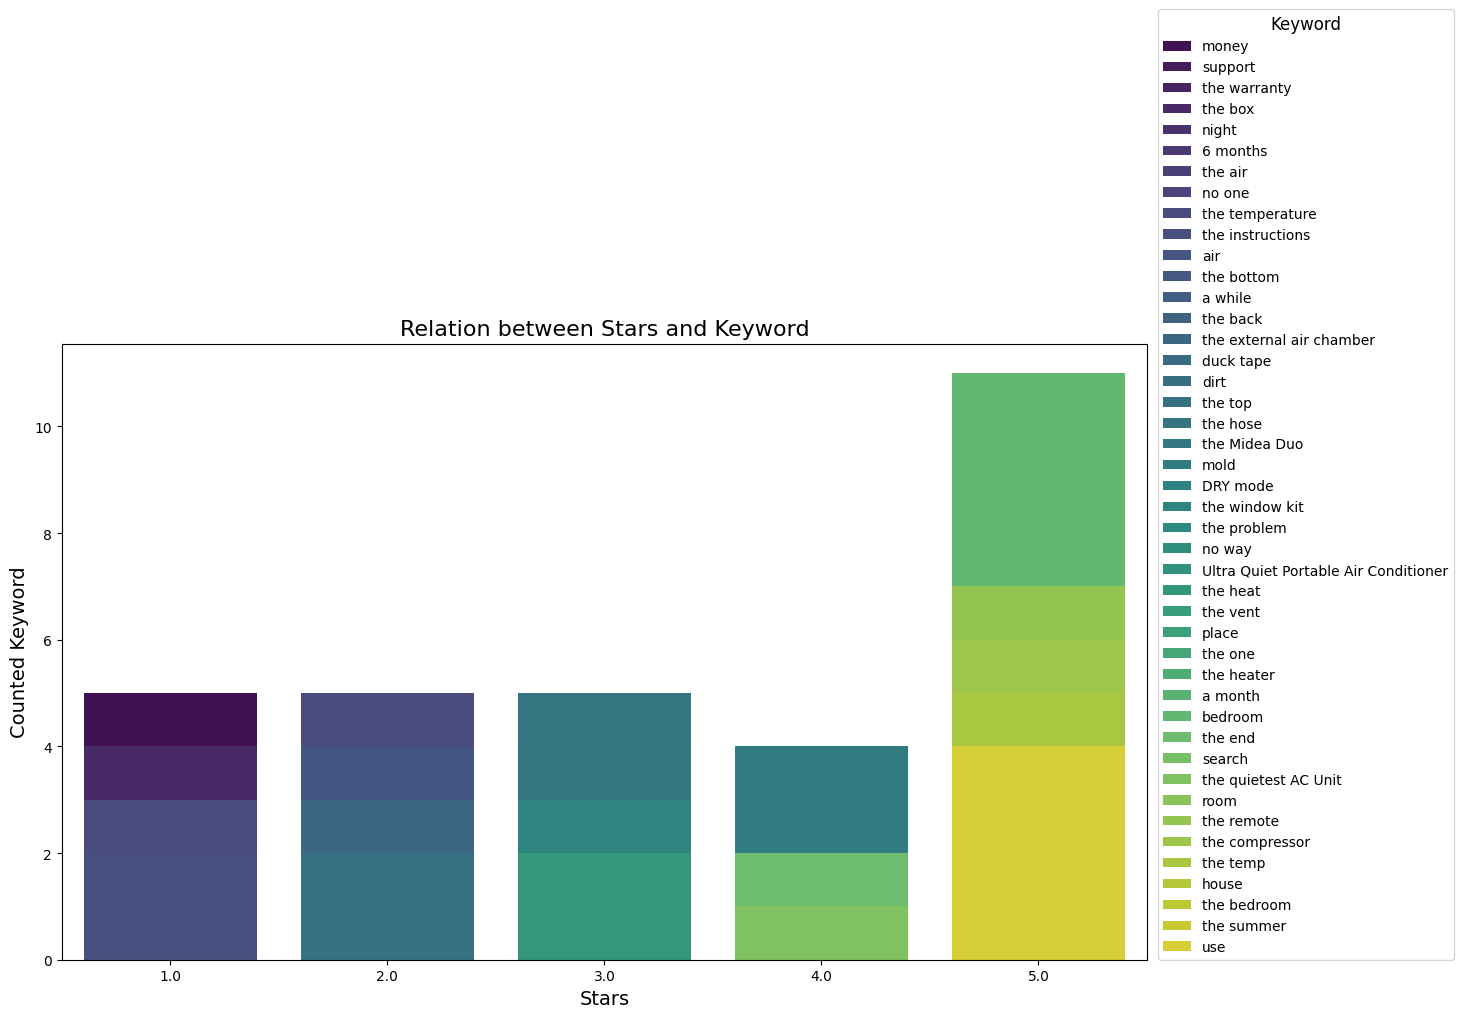

In [ ]:
import pandas as pd

keywords_df = pd.DataFrame()

for star, keywords in keywords_by_stars.items():
    for keyword, count in keywords:
        keywords_df = keywords_df.append({
            'Star': star,
            'Keyword': keyword,
            'Count': count
        }, ignore_index=True)
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 8))
sns.barplot(data=keywords_df, x='Star', y='Count', hue='Keyword', dodge=False, palette='viridis')

plt.xlabel('Stars', fontsize=14)
plt.ylabel('Counted Keyword', fontsize=14)
plt.title('Relation between Stars and Keyword', fontsize=16)

#
num1=1.01
num2=0
num3=3
num4=0
plt.legend(title='Keyword', title_fontsize=12,bbox_to_anchor=(num1,num2), loc=num3,borderaxespad=num4)


plt.show()


# **京东**

In [ ]:
import io
JD = pd.read_csv('京东评论-当前商品最近评论1043.csv')

In [ ]:
JD

,商品名称,价格,会员,级别,评价星级,评价内容,时间,点赞数,评论数,追评时间,追评内容,商品属性,页面网址,页面标题,采集时间,sku,好评度,评价关键词
0,\n \n ...,\n ￥\n ...,j***b ...,,star5,物流小哥很快，,2023-04-15 08:24,0.0,0.0,NaN,NaN,【1.5匹】酷省电一级 节能25% ...,https://item.jd.com/100043945122.html#none,【美的KFR-35GW/N8KS1-1】美的（Midea）空调 1.5匹 酷省电 新一级能效...,2023-04-14 20:51:21.157,1.000439e+11,99%,外观漂亮(154)/\r\n超级省电(133)/\r\n美观大方(119)/\r\n安装师负...
1,\n \n ...,\n ￥\n ...,我***独 ...,,star5,冷暖效果：试了一下非常好，\n静音效果：声音很小，不会影响到人。\n送货时效：非常准时。\n...,2023-04-15 08:14,0.0,0.0,NaN,NaN,【1.5匹】酷省电一级 节能25% ...,https://item.jd.com/100043945122.html#none,【美的KFR-35GW/N8KS1-1】美的（Midea）空调 1.5匹 酷省电 新一级能效...,2023-04-14 20:51:21.248,1.000439e+11,99%,外观漂亮(154)/\r\n超级省电(133)/\r\n美观大方(119)/\r\n安装师负...
2,\n \n ...,\n ￥\n ...,一***草 ...,PLUS会员,star5,安装师傅贼啦用心，高空作业真得是棒棒的，专业，快速，很耐心讲解不懂的地方！！一次很好的购物体...,2023-04-14 22:53,0.0,0.0,NaN,NaN,【1.5匹】酷省电一级 节能25% ...,https://item.jd.com/100043945122.html#none,【美的KFR-35GW/N8KS1-1】美的（Midea）空调 1.5匹 酷省电 新一级能效...,2023-04-14 20:51:21.350,1.000439e+11,99%,外观漂亮(154)/\r\n超级省电(133)/\r\n美观大方(119)/\r\n安装师负...
3,\n \n ...,\n ￥\n ...,j***c ...,,star5,安装师傳上门非常迅速并且准时，整体售后服务态度非常好，师傅有耐心。安装得非常专业且美观，安装...,2023-04-14 22:39,0.0,0.0,NaN,NaN,【1.5匹】酷省电一级 节能25% ...,https://item.jd.com/100043945122.html#none,【美的KFR-35GW/N8KS1-1】美的（Midea）空调 1.5匹 酷省电 新一级能效...,2023-04-14 20:51:21.424,1.000439e+11,99%,外观漂亮(154)/\r\n超级省电(133)/\r\n美观大方(119)/\r\n安装师负...
4,\n \n ...,\n ￥\n ...,j***2 ...,,star5,速度还是蛮快的 不错,2023-04-14 22:09,0.0,0.0,NaN,NaN,【1.5匹】酷省电一级 节能25% ...,https://item.jd.com/100043945122.html#none,【美的KFR-35GW/N8KS1-1】美的（Midea）空调 1.5匹 酷省电 新一级能效...,2023-04-14 20:51:21.510,1.000439e+11,99%,外观漂亮(154)/\r\n超级省电(133)/\r\n美观大方(119)/\r\n安装师负...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1420,\n \n ...,\n ￥\n ...,申***龙 ...,PLUS会员,star3,物流慢的不得了，足足等了7天才送到，购物心情特别差，客服还推卸责任，踢皮球，差评，,2023-01-16 10:19,0.0,1.0,NaN,NaN,【1.5匹】风酷一级 节能速暖 ...,https://item.jd.com/100013588053.html#comment,【美的KFR-35GW/N8XHC1】美的（Midea）1.5匹 风酷 新一级能效 变频冷暖...,2023-04-14 21:22:06.682,1.000136e+11,99%,送货安装(8078)/\r\n超级省电(6118)/\r\n外观漂亮(5645)/\r\n美...
1421,\n \n ...,\n ￥\n ...,u***q ...,,star1,刚刚买的新空调，就不能正常使用，差评,2023-04-05 17:36,0.0,1.0,NaN,NaN,【1.5匹】风酷一级 金榜爆款 ...,https://item.jd.com/100013588053.html#comment,【美的KFR-35GW/N8XHC1】美的（Midea）1.5匹 风酷 新一级能效 变频冷暖...,2023-04-14 21:22:06.789,1.000136e+11,99%,送货安装(8078)/\r\n超级省电(6118)/\r\n外观漂亮(5645)/\r\n美...
1422,\n \n ...,\n ￥\n ...,j***d ...,,star1,十一号到的货说是十四号来安装，十四号下午打了两个电话给安装师傅不接没来安装，十五号还没来，现...,2023-01-15 10:57,0.0,1.0,NaN,NaN,【1.5匹】风酷一级 节能速暖 ...,https://item.jd.com/100013588053.html#comment,【美的KFR-35GW/N8XHC1】美的（Midea）1.5匹 风酷 新一级能效 变频冷暖...,2023-04-14 21:22:18.393,1.000136e+11,99%,送货安装(8078)/\r\n超级省电(6118)/\r\n外观漂亮(5645)/\r\n美...
1423,\n \n ...,\n ￥\n ...,x***3 ...,,star1,客服服务极差，各种甩锅，自己看错了，要客户承担，店大欺客,2023-04-10 14:03,0.0,1.0,NaN,NaN,【1.5匹】风酷一级 金榜爆款 ...,https://item.jd.com/100013588053.html#comment,【美的KFR-35GW/N8XHC1】美的（Midea）1.5匹 风酷 新一级能效 变频冷暖...,2023-04-14 21:22:18.485,1.000136e+11,99%,送货安装(8078)/\r\n超级省电(6118)/\r\n外观漂亮(5645)/\r\n美...


In [ ]:
# Remove raw data columns: '页面网址','PurchasemModel_Color','PurchasemModel_Size','ASIN'
JD = JD.drop(['页面网址', '商品名称','价格','级别','点赞数','评论数','商品属性','页面标题','采集时间','sku','好评度'], axis=1)

In [ ]:
# 统一格式
JD = JD.dropna(subset=['评价星级'])
JD["评价星级"] = JD["评价星级"].str.extract("(\d+)").astype(int)


<ipython-input-32-b7d996a4f991>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  JD["评价星级"] = JD["评价星级"].str.extract("(\d+)").astype(int)


In [ ]:
# 清理换行符
JD["评价关键词"] = JD["评价关键词"].replace(r'\n', ' ', regex=True)
JD["评价关键词"] = JD["评价关键词"].replace(r'\r', ' ', regex=True)

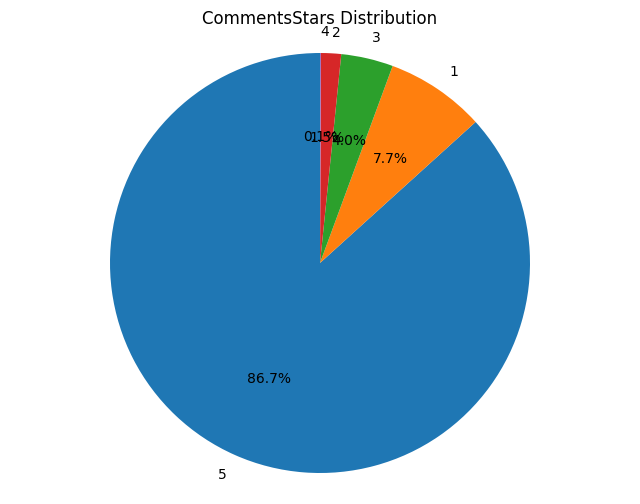

In [ ]:
# 对评价星级进行视觉化展示
sentiment_counts = JD['评价星级'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # 使饼图呈圆形
plt.title('CommentsStars Distribution')
plt.show()




In [ ]:
!pip install jieba
!pip install snownlp


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.6/37.6 MB 19.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for snownlp: filename=snownlp-0.12.3-py3-none-any.whl size=37760964 sha256=05e4149d8a527f2af4890c1afa295734d866e4a18d02aa2e17ee9d655ceac1f6
  Stored in directory: /root/.cache/pip/wheels/64/3a/d2/0572cf9eb7022ac27ca0abc27ad4b37020fc26b111466d0438
Successfully built snownlp


In [ ]:
# 对评论进行感情分析
from snownlp import SnowNLP
import jieba
def get_sentiment_score(text):
    if isinstance(text, str):
        s = SnowNLP(" ".join(jieba.cut(text)))
        return s.sentiments
    else:
        return None

def classify_sentiment(score):
    if score > 0.6:
        return 'positive'
    elif score < 0.4:
        return 'negative'
    else:
        return 'neural'


In [ ]:


# 合并“评价内容”和“追评内容”列，用空格分隔
JD["合并内容"] = JD["评价内容"].fillna('') + ' ' + JD["追评内容"].fillna('')

# 计算情感得分和类别
JD["合并内容情感得分"] = JD["合并内容"].apply(get_sentiment_score)
JD["合并内容情感类别"] = JD["合并内容情感得分"].apply(classify_sentiment)



Building prefix dict from the default dictionary ...
DEBUG:jieba:Building prefix dict from the default dictionary ...
Dumping model to file cache /tmp/jieba.cache
DEBUG:jieba:Dumping model to file cache /tmp/jieba.cache
Loading model cost 0.904 seconds.
DEBUG:jieba:Loading model cost 0.904 seconds.
Prefix dict has been built successfully.
DEBUG:jieba:Prefix dict has been built successfully.


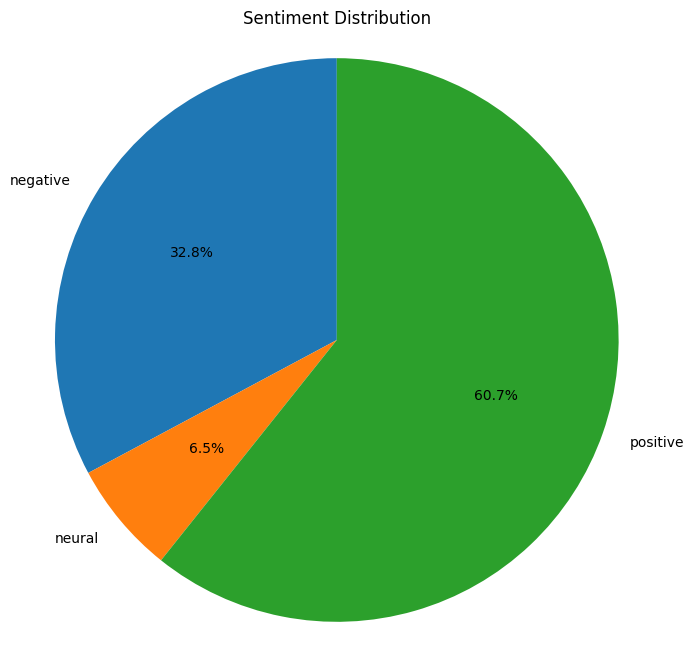

In [42]:
# 计算正面、负面、中性评论的数量
merged_sentiment_counts = JD["合并内容情感类别"].value_counts().sort_index()

# 绘制饼图
plt.figure(figsize=(8, 8))
plt.pie(merged_sentiment_counts.values, labels=merged_sentiment_counts.index, autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # 使饼图为圆形
plt.title("Sentiment Distribution")
plt.show()



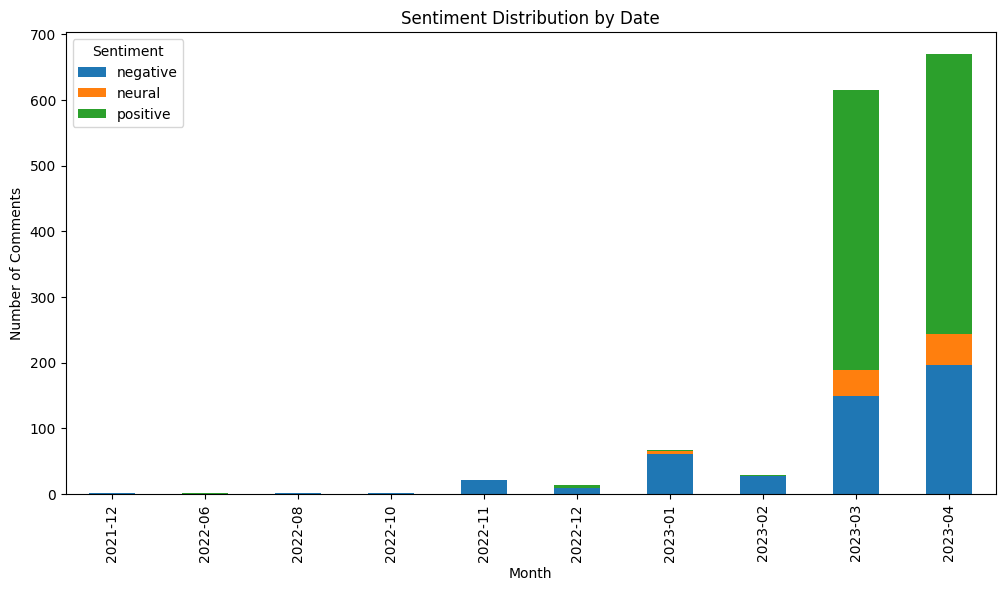

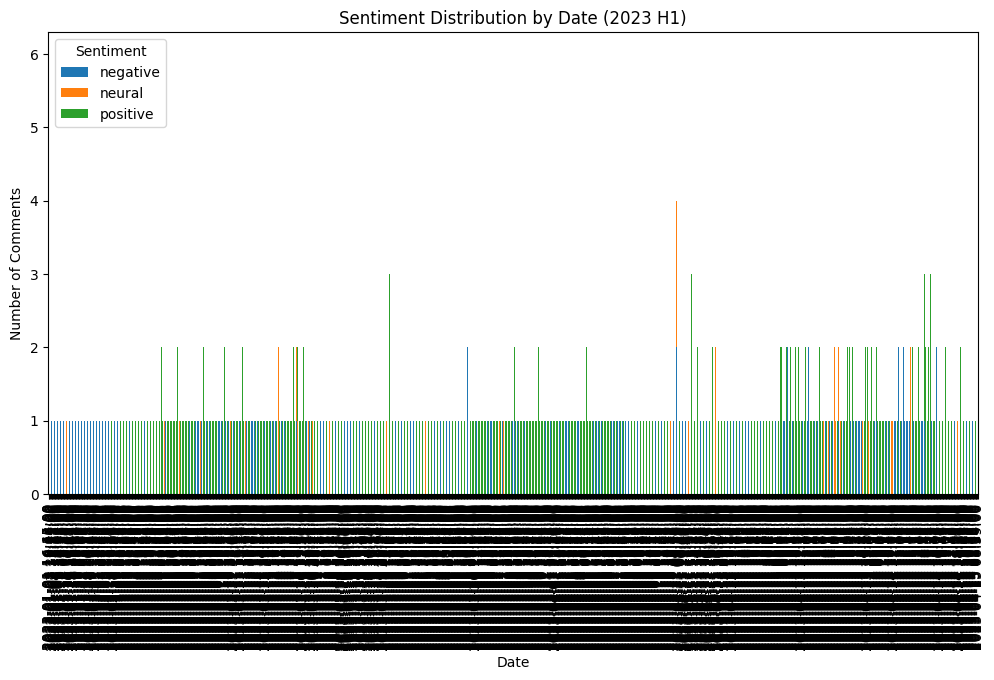

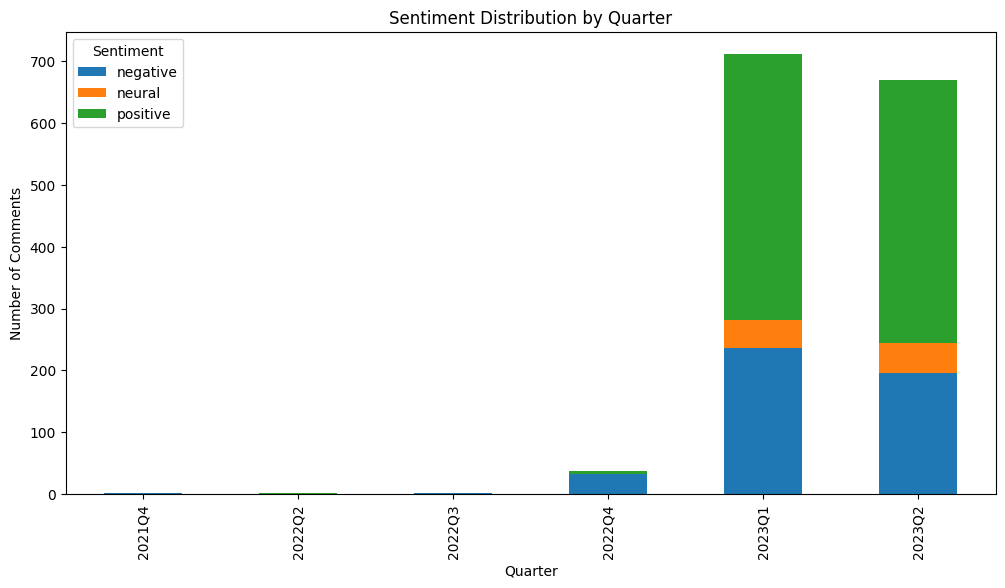

In [ ]:
# 整个时间线顾客情感倾向的变化
grouped_df = JD.groupby(['合并内容情感类别', '时间']).size().reset_index(name='Count')

import matplotlib.pyplot as plt
import seaborn as sns

JD['时间'] = JD['时间'].apply(pd.to_datetime)
JD['时间'] = pd.to_datetime(JD['时间'], errors='coerce')
# 截取月份（不包括天数）
JD['月份'] = JD['时间'].apply(lambda x: x.strftime('%Y-%m'))

# 按月份和情感标签分组
grouped_df = JD.groupby(['合并内容情感类别', '月份']).size().reset_index(name='Count')

# 创建一个宽格式的DataFrame，其中每行表示一个日期，每列表示一个情感标签，值表示评论数量
pivot_df = grouped_df.pivot(index='月份', columns='合并内容情感类别', values='Count').fillna(0)

# 创建堆叠柱状图
ax = pivot_df.plot(kind='bar', stacked=True, figsize=(12, 6))

# 设置图表标题和坐标轴标签
ax.set_title('Sentiment Distribution by Date')
ax.set_xlabel('Month')
ax.set_ylabel('Number of Comments')

# 添加图例
ax.legend(title='Sentiment')

# 显示图表
plt.show()


#季度的趋势变化
JD['Quarter'] = JD['时间'].dt.to_period('Q')
grouped_df = JD.groupby(['合并内容情感类别', 'Quarter']).size().reset_index(name='Count')
import matplotlib.pyplot as plt
import seaborn as sns

# 创建一个宽格式的DataFrame，其中每行表示一个季度，每列表示一个情感标签，值表示评论数量
pivot_df = grouped_df.pivot(index='Quarter', columns='合并内容情感类别', values='Count').fillna(0)

# 创建堆叠柱状图
ax = pivot_df.plot(kind='bar', stacked=True, figsize=(12, 6))

# 设置图表标题和坐标轴标签
ax.set_title('Sentiment Distribution by Quarter')
ax.set_xlabel('Quarter')
ax.set_ylabel('Number of Comments')

# 添加图例
ax.legend(title='Sentiment')

# 显示图表
plt.show()

In [ ]:
# 上传字体文件
uploaded = files.upload()
font_file = list(uploaded.keys())[0]

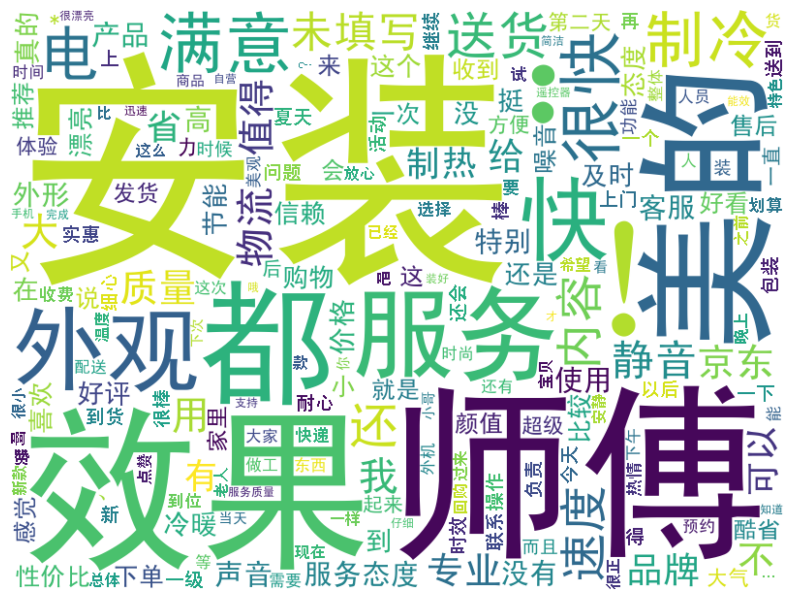

In [ ]:
# 评价关键词中的高频词
import jieba
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from google.colab import files



# 合并所有评论文本
all_reviews = " ".join(JD["合并内容"])

# 使用 jieba 分词
words = jieba.cut(all_reviews)

# 计算词频
word_counts = Counter(words)

# 移除停用词，如标点符号和常见词汇，你可以根据需要自定义停用词列表
stopwords = {',', '.', '，', '。', ' ', '的', '了', '和','3','也','好','很','非常','不错','!','是','用户','此','空调','就',':','?','买','购买','评价'}
filtered_word_counts = {word: count for word, count in word_counts.items() if word not in stopwords}

# 生成词云
wordcloud = WordCloud(font_path=font_file, background_color="white", width=800, height=600).generate_from_frequencies(filtered_word_counts)

# 显示词云
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


      1    2    3    4       5
很快  0.0  0.0  0.0  2.0     0.0
安装  0.0  0.0  0.0  0.0  1062.0


<ipython-input-134-ab0c6a4f9b11>:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  keywords_df = keywords_df.append({
<ipython-input-134-ab0c6a4f9b11>:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  keywords_df = keywords_df.append({


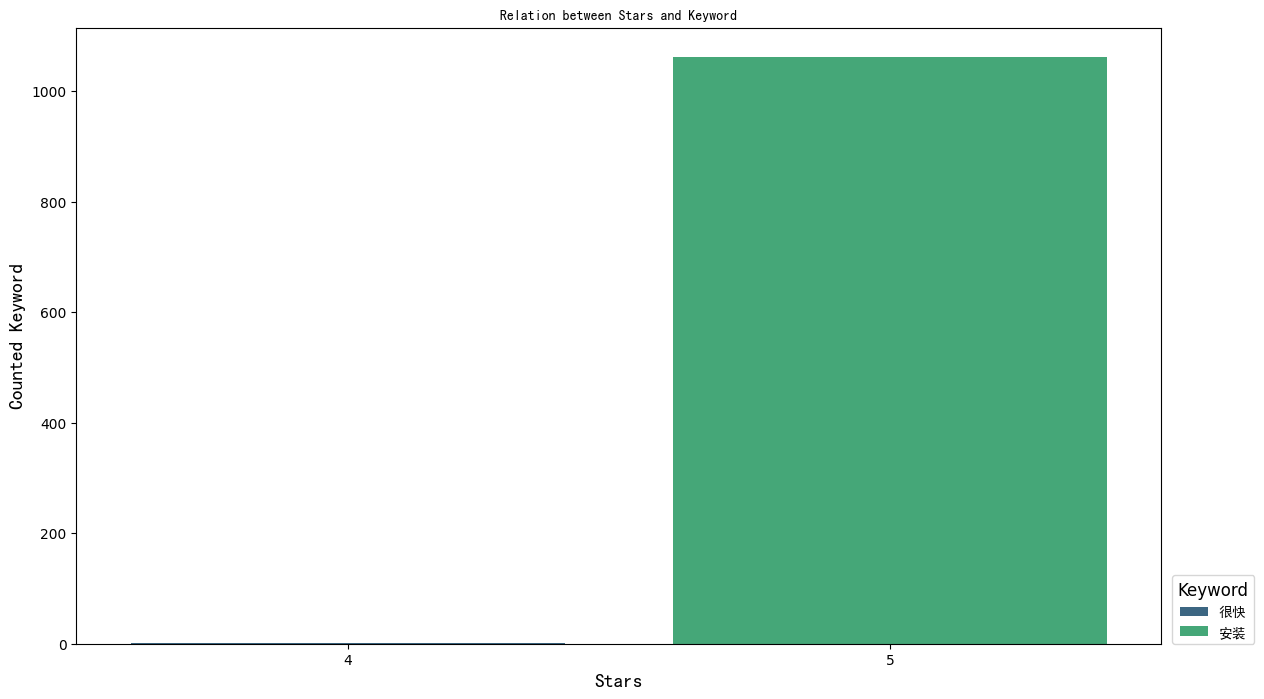

In [ ]:
# 按评价星级对数据进行分组
grouped_by_star = JD.groupby("评价星级")

# 保存每个星级的前五高频关键词
top_keywords_by_star = {}

for star, group in grouped_by_star:
    all_reviews = " ".join(group["合并内容"])
    words = jieba.cut(all_reviews)
    word_counts = Counter(words)

    stopwords = {',', '.', '，', '。', ' ', '的', '了', '和','3','也','好','很','非常','不错','!','是','用户','此','空调','就',':','?','买','购买','评价'}
    filtered_word_counts = {word: count for word, count in word_counts.items() if word not in stopwords}

    top_keywords = dict(word_counts.most_common(5))

    # 只保留不在停用词列表中的关键词
    top_keywords = {word: count for word, count in top_keywords.items() if word not in stopwords}
    top_keywords_by_star[star] = top_keywords

# 将结果转换为 DataFrame
top_keywords_df = pd.DataFrame(top_keywords_by_star).fillna(0)

print(top_keywords_df)

# 设置字体属性
from matplotlib.font_manager import FontProperties
font = FontProperties(fname=font_file)

keywords_df = pd.DataFrame()

for star, keywords in top_keywords_by_star.items():
    for keyword, count in keywords.items():
        keywords_df = keywords_df.append({
            'Star': star,
            'Keyword': keyword,
            'Count': count
        }, ignore_index=True)

plt.figure(figsize=(14, 8))
sns.barplot(data=keywords_df, x='Star', y='Count', hue='Keyword', dodge=False, palette='viridis')

plt.xlabel('Stars', fontsize=14, fontproperties=font)
plt.ylabel('Counted Keyword', fontsize=14, fontproperties=font)
plt.title('Relation between Stars and Keyword', fontsize=16, fontproperties=font)

num1=1.01
num2=0
num3=3
num4=0
plt.legend(title='Keyword', title_fontsize=12, bbox_to_anchor=(num1, num2), loc=num3, borderaxespad=num4, prop=font)

plt.show()

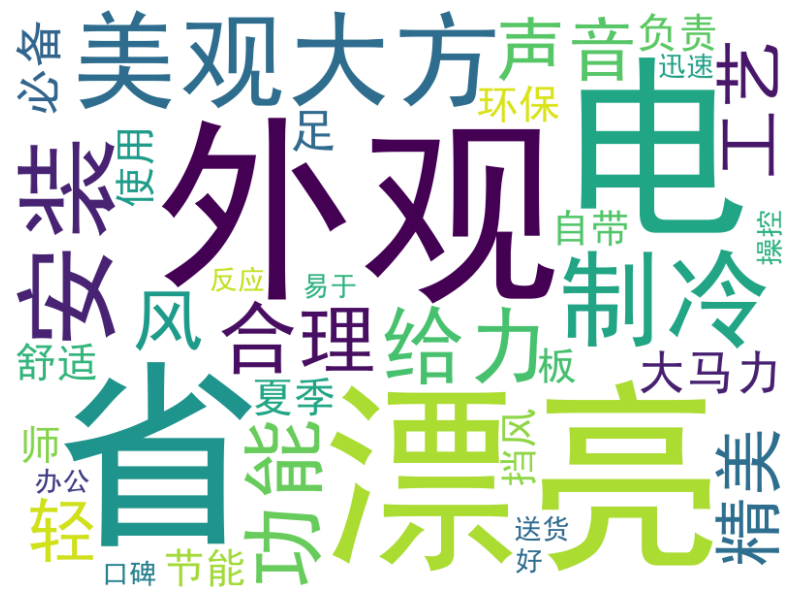

In [ ]:
# 评价关键词中的高频词
import jieba
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from google.colab import files



# 合并所有评论文本
all_reviews = " ".join(JD["评价关键词"])
all_reviews = re.sub(r'[^\w\s]', '', all_reviews)  # 去除标点符号
all_reviews = re.sub(r'\d+', '', all_reviews)  # 去除数字

# 使用 jieba 分词
words = jieba.cut(all_reviews)

# 计算词频
word_counts = Counter(words)

# 移除停用词，如标点符号和常见词汇，你可以根据需要自定义停用词列表
stopwords = {'很','超级'}
filtered_word_counts = {word: count for word, count in word_counts.items() if word not in stopwords}

# 生成词云
wordcloud = WordCloud(font_path=font_file, background_color="white", width=800, height=600).generate_from_frequencies(filtered_word_counts)

# 显示词云
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

        1     2     3    4       5
外观  109.0   0.0   0.0  1.0  1234.0
漂亮  109.0   0.0   0.0  1.0  1234.0
送货    0.0  22.0  57.0  0.0     0.0
安装    0.0  22.0  57.0  0.0     0.0
省     0.0   0.0   0.0  1.0     0.0


<ipython-input-141-eed010ecaf53>:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  keywords_df = keywords_df.append({
<ipython-input-141-eed010ecaf53>:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  keywords_df = keywords_df.append({
<ipython-input-141-eed010ecaf53>:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  keywords_df = keywords_df.append({
<ipython-input-141-eed010ecaf53>:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  keywords_df = keywords_df.append({
<ipython-input-141-eed010ecaf53>:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  

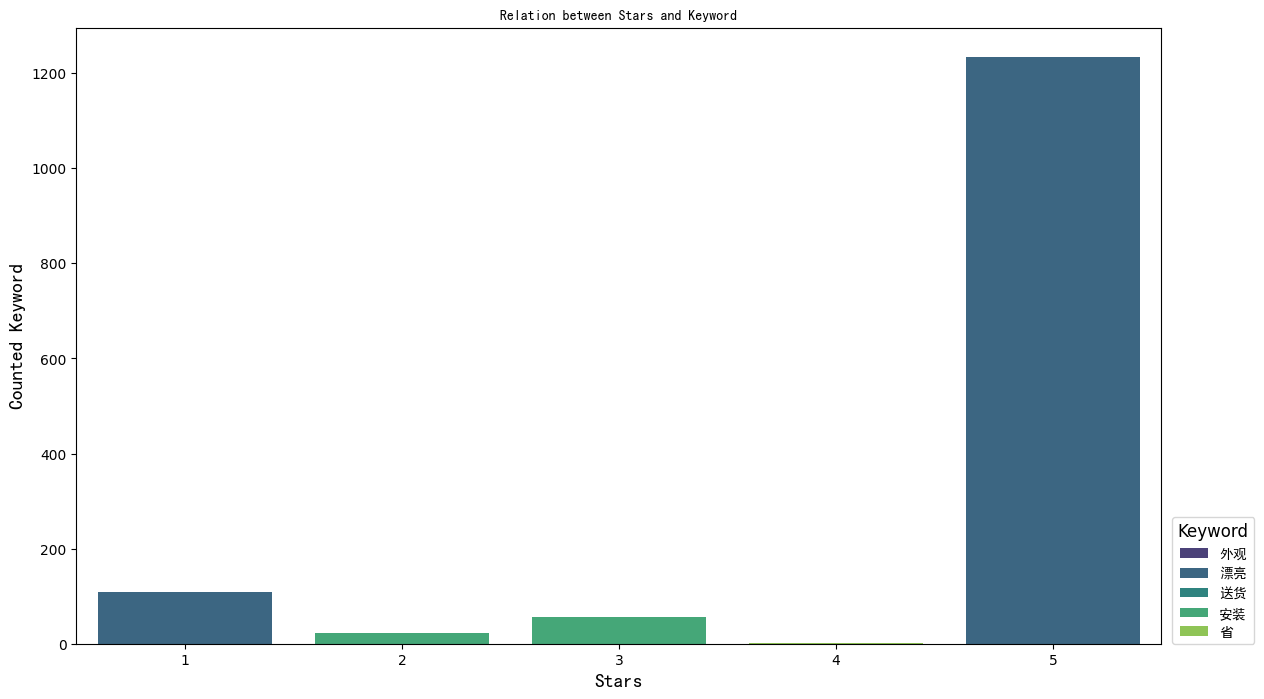

In [ ]:
# 按评价星级对数据进行分组
grouped_by_star = JD.groupby("评价星级")

# 保存每个星级的前五高频关键词
top_keywords_by_star = {}

for star, group in grouped_by_star:
    all_reviews = " ".join(group["评价关键词"])
    all_reviews = re.sub(r'[^\w\s]', '', all_reviews)  # 去除标点符号
    all_reviews = re.sub(r'\d+', '', all_reviews)  # 去除数字
    words = jieba.cut(all_reviews)
    word_counts = Counter(words)

    stopwords = {'很',' ','超级'}
    filtered_word_counts = {word: count for word, count in word_counts.items() if word not in stopwords}

    top_keywords = dict(word_counts.most_common(5))

    # 只保留不在停用词列表中的关键词
    top_keywords = {word: count for word, count in top_keywords.items() if word not in stopwords}
    top_keywords_by_star[star] = top_keywords

# 将结果转换为 DataFrame
top_keywords_df = pd.DataFrame(top_keywords_by_star).fillna(0)

print(top_keywords_df)

# 设置字体属性
from matplotlib.font_manager import FontProperties
font = FontProperties(fname=font_file)

keywords_df = pd.DataFrame()

for star, keywords in top_keywords_by_star.items():
    for keyword, count in keywords.items():
        keywords_df = keywords_df.append({
            'Star': star,
            'Keyword': keyword,
            'Count': count
        }, ignore_index=True)

plt.figure(figsize=(14, 8))
sns.barplot(data=keywords_df, x='Star', y='Count', hue='Keyword', dodge=False, palette='viridis')

plt.xlabel('Stars', fontsize=14, fontproperties=font)
plt.ylabel('Counted Keyword', fontsize=14, fontproperties=font)
plt.title('Relation between Stars and Keyword', fontsize=16, fontproperties=font)

num1=1.01
num2=0
num3=3
num4=0
plt.legend(title='Keyword', title_fontsize=12, bbox_to_anchor=(num1, num2), loc=num3, borderaxespad=num4, prop=font)

plt.show()